## KMeans

In [1]:
# 필요한 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

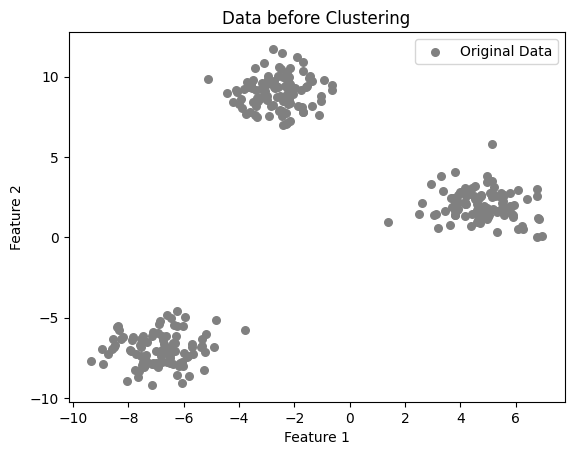

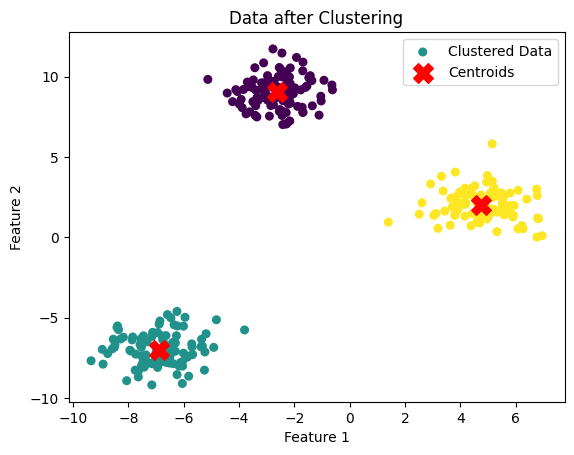

Cluster Centers:
 [[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]
Inertia (WCSS): 566.8595511244131


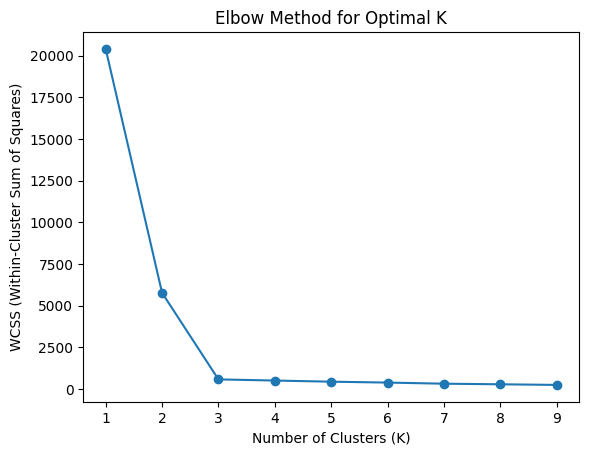

In [2]:
# 1. 데이터 생성
# make_blobs: 군집화에 적합한 샘플 데이터를 생성하는 함수
# n_samples: 데이터 포인트 수, centers: 클러스터 수, random_state: 재현성을 위한 시드값
n_samples = 300
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=1.0, random_state=42)



# 2. 데이터 시각화 (군집화 전)
plt.scatter(X[:, 0], X[:, 1], s=30, c='gray', label="Original Data")
plt.title("Data before Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



# 3. K-Means 모델 생성 및 학습
# KMeans 클래스: 사이킷런에서 제공하는 K-Means 구현
# n_clusters: 클러스터 개수, random_state: 결과 재현성을 위한 시드값
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# fit_predict: 데이터를 클러스터링하고 각 데이터 포인트의 클러스터 레이블을 반환
cluster_labels = kmeans.fit_predict(X)



# 4. 군집화 결과 시각화
# 각 데이터 포인트의 클러스터에 따라 색을 지정
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=30,
label="Clustered Data")

# 클러스터 중심 시각화
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label="Centroids", marker='X')
plt.title("Data after Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



# 5. 모델 세부 정보 확인
# kmeans.cluster_centers_: 클러스터 중심 좌표
# kmeans.inertia_: 클러스터 내 거리 합 (WCSS)
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Inertia (WCSS):", kmeans.inertia_)



# 6. 최적의 K 값을 찾기 위한 엘보우 방법 (추가 분석)
# 다양한 K 값에 대한 Inertia 계산
wcss = []
K_range = range(1, 10)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X)
    wcss.append(kmeans_temp.inertia_)

# 엘보우 그래프 그리기
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

## 클러스터 품질 평가 예제

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples

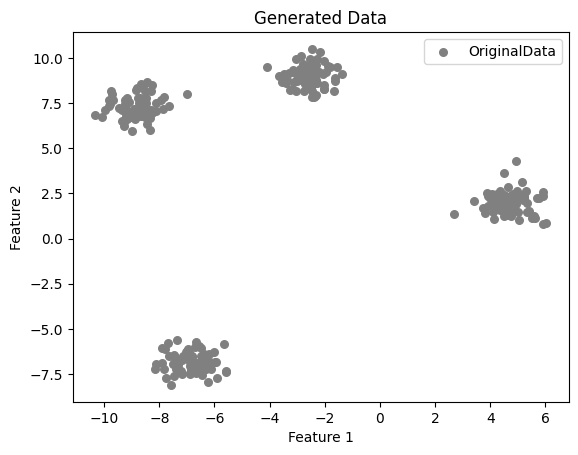

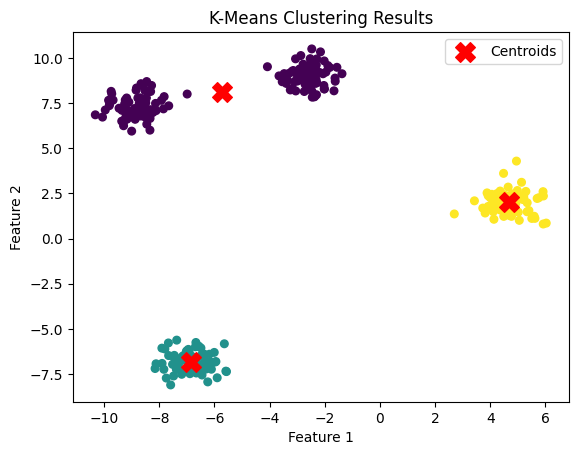

Overall Silhouette Score: 0.80


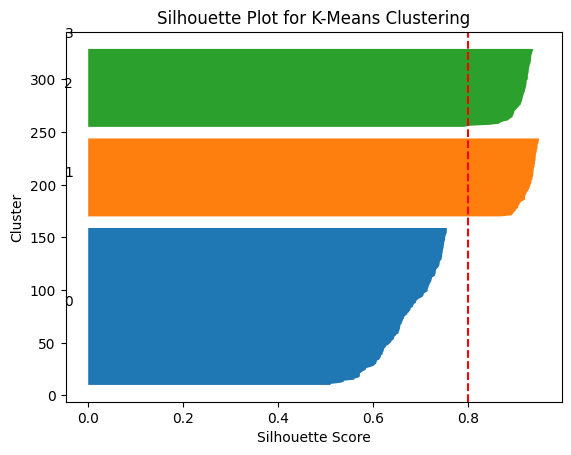

Cluster Centers:
[[-5.7198651   8.11855424]
 [-6.85126211 -6.85031833]
 [ 4.68687447  2.01434593]]
Silhouette Score for each point stored as silhouette_values array.


In [4]:
# 1. 데이터 생성
# - make_blobs를 사용하여 군집화에 적합한 샘플 데이터를 생성합니다.
# - centers: 생성할 클러스터의 수
# - n_samples: 생성할 데이터 포인트 수
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6,
random_state=42)
# 데이터 시각화 (원본 데이터)
plt.scatter(data[:, 0], data[:, 1], s=30, color='gray', label="OriginalData")
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



# 2. K-Means 알고리즘 적용
# - n_clusters: 생성할 클러스터 수
# - random_state: 결과 재현성을 위한 랜덤 시드
kmeans = KMeans(n_clusters=3, random_state=42)
# K-Means 모델 학습 및 클러스터 예측
# - fit_predict: 데이터를 학습시키고 각 데이터 포인트의 클러스터 할당을 반환
cluster_labels = kmeans.fit_predict(data)
# 클러스터링 결과 시각화
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids') # 클러스터 중심
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



# 3. 클러스터 품질 평가 - 실루엣 점수 계산
# - silhouette_score: 전체 데이터에 대한 평균 실루엣 점수를 계산
silhouette_avg = silhouette_score(data, cluster_labels)
print(f"Overall Silhouette Score: {silhouette_avg:.2f}")



# 4. 실루엣 점수 시각화 - 각 데이터 포인트의 실루엣 점수를 계산
silhouette_values = silhouette_samples(data, cluster_labels)
# 시각화 준비
y_lower = 10
for i in range(4): # 각 클러스터에 대해 반복
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # 클러스터별 막대 그리기
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # 클러스터 번호
    y_lower = y_upper + 10 # 다음 클러스터로 이동

# 그래프 설정
plt.axvline(x=silhouette_avg, color="red", linestyle="--") # 평균 실루엣 점수
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster")
plt.show()



# 5. 결과 요약 - 실루엣 점수와 클러스터 중심 출력
print(f"Cluster Centers:\n{kmeans.cluster_centers_}")
print(f"Silhouette Score for each point stored as silhouette_values array.")

## Hierarchical Clustering (계층적 군집화) 예제

In [5]:
# 필요한 라이브러리 임포트
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

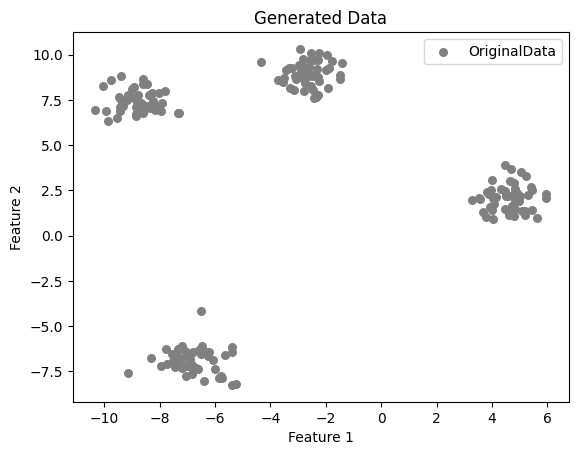

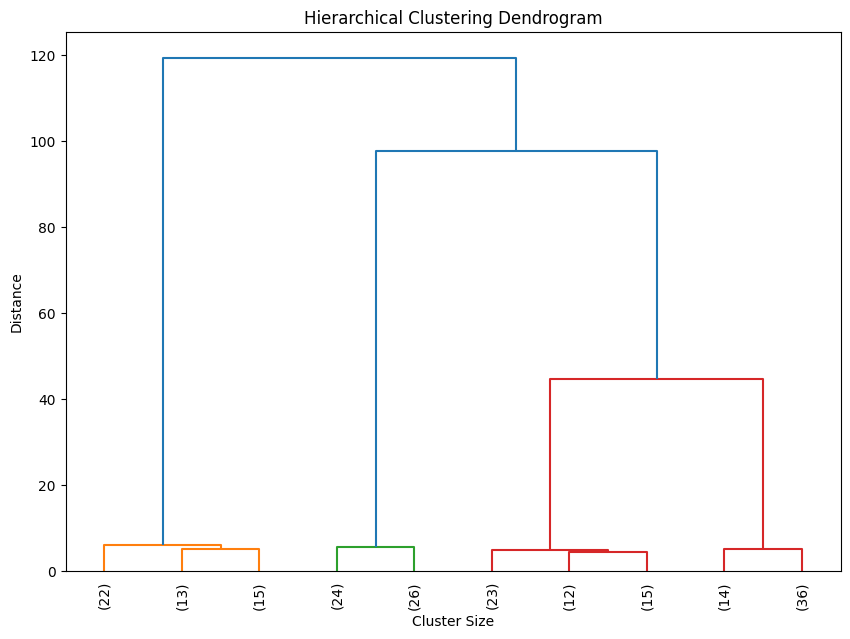

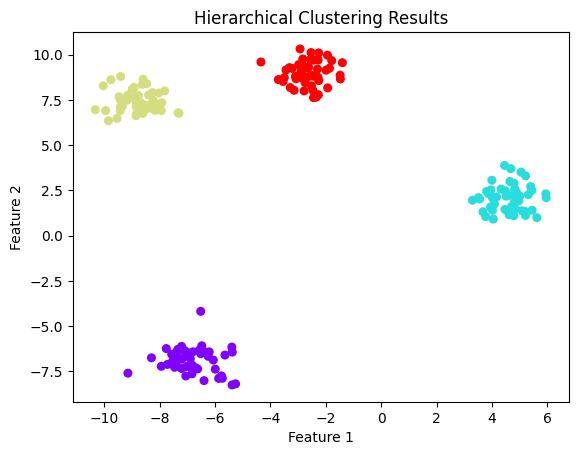

In [6]:
# 1. 데이터 생성
# - 군집화 실험에 적합한 샘플 데이터를 생성합니다.
# - make_blobs: 클러스터가 명확히 구분되는 데이터셋 생성
data, _ = make_blobs(n_samples=200, centers=4, cluster_std=0.7,random_state=42)
# 데이터 시각화 (원본 데이터)
plt.scatter(data[:, 0], data[:, 1], s=30, color='gray', label="OriginalData")
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



# 2. 계층적 군집화 적용
# - linkage 함수를 사용하여 클러스터 간의 거리 계산
# - method='ward': Ward's method로 데이터 간 거리 기반 병합
linked = linkage(data, method='ward')
# 3. 덴드로그램 시각화
# - linkage 결과를 기반으로 덴드로그램을 생성합니다.
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()



# 4. 클러스터 형성
# - fcluster: 덴드로그램의 특정 거리 기준으로 클러스터를 형성
# - t=7: 클러스터를 나누는 임계값 (거리 기준)
cluster_labels = fcluster(linked, t=7, criterion='distance')



# 5. 결과 시각화
# - 각 클러스터를 색상으로 구분하여 시각화
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='rainbow', s=30)
plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## DBSCAN

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

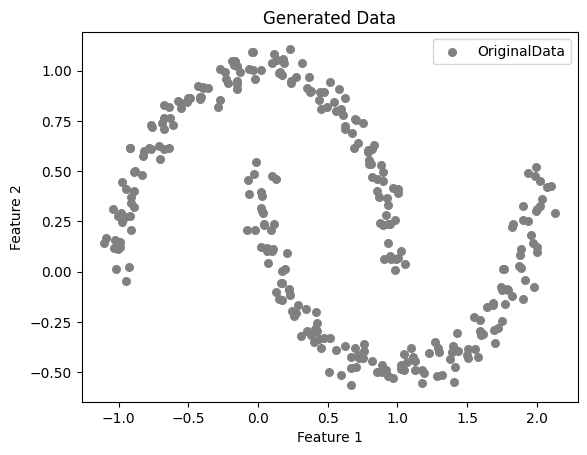

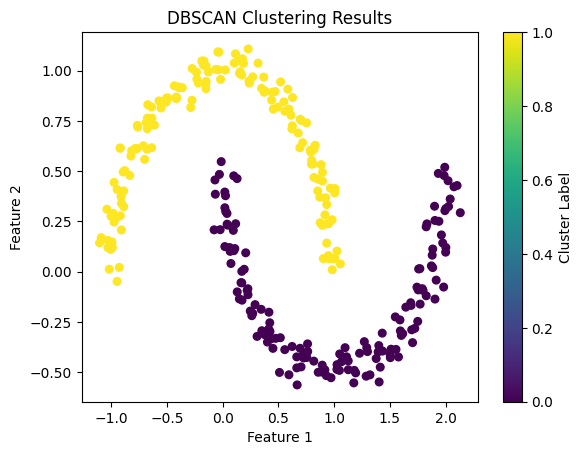

Unique Clusters: {np.int64(0), np.int64(1)}
Cluster 0: 150 points
Cluster 1: 150 points


In [8]:
# 1. 데이터 생성
# - make_moons: 비구형(non-linear) 데이터 구조를 가진 샘플 데이터를 생성
# - noise=0.05: 데이터에 노이즈 추가
data, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
# 데이터 시각화
plt.scatter(data[:, 0], data[:, 1], s=30, color='gray', label="OriginalData")
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



# 2. DBSCAN 모델 생성 및 학습
# - eps: 포인트 간 거리가 이 값 이하일 때 이웃으로 간주 (밀도의 기준)
# - min_samples: 핵심 포인트가 되기 위한 최소 이웃 데이터 수
dbscan = DBSCAN(eps=0.2, min_samples=5)
# 데이터에 대한 클러스터 예측
cluster_labels = dbscan.fit_predict(data)



# 3. 클러스터링 결과 분석
# 클러스터링 결과 시각화
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()



# 4. 클러스터링 결과 요약
# - 클러스터 레이블: 클러스터 번호 (노이즈는 -1로 표시)
unique_labels = set(cluster_labels)
print(f"Unique Clusters: {unique_labels}")
# 클러스터별 데이터 포인트 수 출력
for label in unique_labels:
    count = (cluster_labels == label).sum()
    if label == -1:
        print(f"Noise points: {count}")
    else:
        print(f"Cluster {label}: {count} points")

# PCA 예제

In [9]:
# 필요한 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

Explained variance ratio: [0.72962445 0.22850762]


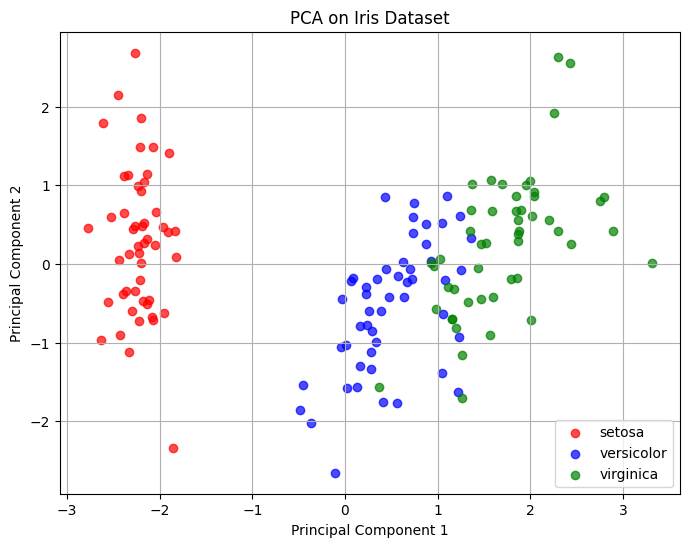

In [10]:
# 1. Iris 데이터셋 로드
# - Iris 데이터셋은 꽃잎 길이, 꽃잎 너비 등 4개의 피처를 가진 데이터로 구성
iris = load_iris()
X = iris.data # 특성 데이터 (4차원)
y = iris.target # 타깃 데이터 (0, 1, 2의 세 가지 클래스)



# 2. 데이터 정규화 (평균=0, 표준편차=1로 변환)
# - PCA는 데이터의 스케일에 민감하므로 정규화가 필수
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# 3. PCA 객체 생성 및 적합
# - n_components=2로 설정하여 데이터를 2차원으로 축소
pca = PCA(n_components=2) # 2개의 주성분으로 축소
X_pca = pca.fit_transform(X_scaled)



# 4. PCA 결과 출력
# - 각 주성분이 데이터의 분산을 얼마나 설명하는지 출력
print("Explained variance ratio:", pca.explained_variance_ratio_)
# - 첫 번째 주성분과 두 번째 주성분이 전체 분산의 약 95% 이상을 설명



# 5. PCA 결과 시각화
# - 두 개의 주성분을 사용해 데이터를 2D 플롯으로 시각화
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'blue', 'green'], iris.target_names):
    plt.scatter(X_pca[y == target, 0], # 첫 번째 주성분
    X_pca[y == target, 1], # 두 번째 주성분
    color=color, label=label, alpha=0.7)
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

## t-SNE

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


데이터 로드 중...
데이터 전처리 중...
t-SNE 모델 생성 중...
시각화 중...


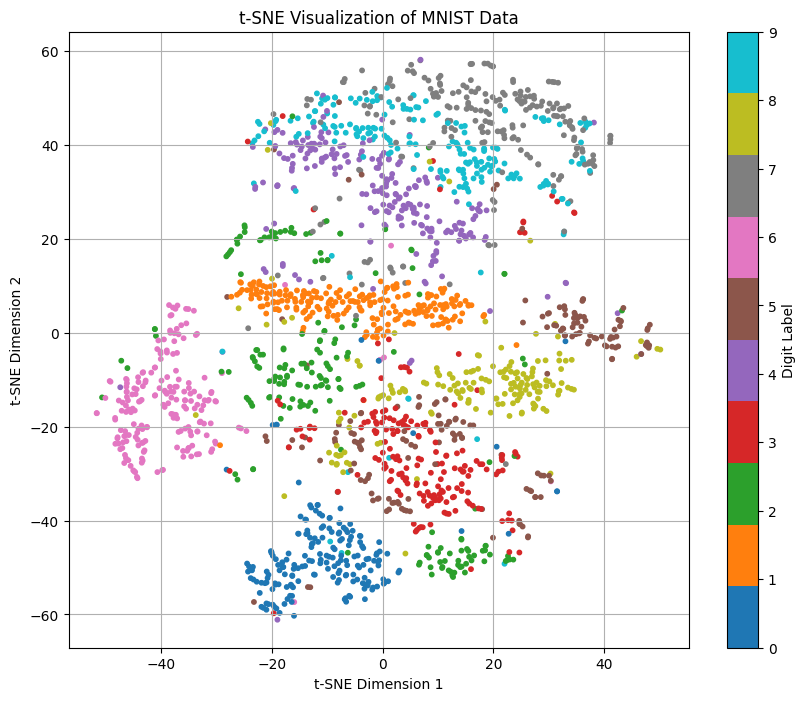

In [12]:
# 1. MNIST 데이터셋 불러오기
# MNIST 데이터는 28x28 픽셀의 손글씨 숫자 이미지입니다.
print("데이터 로드 중...")
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target # X: 이미지 벡터, y: 레이블



# 2. 데이터 전처리
# t-SNE는 데이터 스케일에 민감하므로 표준화(정규화)가 필요합니다.
print("데이터 전처리 중...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# 3. t-SNE 모델 생성
# 데이터 차원을 2D로 줄여 시각화할 예정입니다.
print("t-SNE 모델 생성 중...")
tsne = TSNE(n_components=2, random_state=42, n_iter_without_progress=1000, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled[:2000]) # 계산 속도를 위해 2000개 샘플만 사용



# 4. 시각화
# t-SNE로 변환된 결과를 시각화합니다.
print("시각화 중...")
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
c=y[:2000].astype(int), cmap='tab10', s=10)
plt.colorbar(scatter, label="Digit Label")
plt.title("t-SNE Visualization of MNIST Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

## Isolation Forest 예제

In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\projec

비정상 데이터 범위:
- 요청 수 (Request Count): 23.80 ~ 144.50
- 응답 시간 (Response Time): 58.22 ~ 145.66


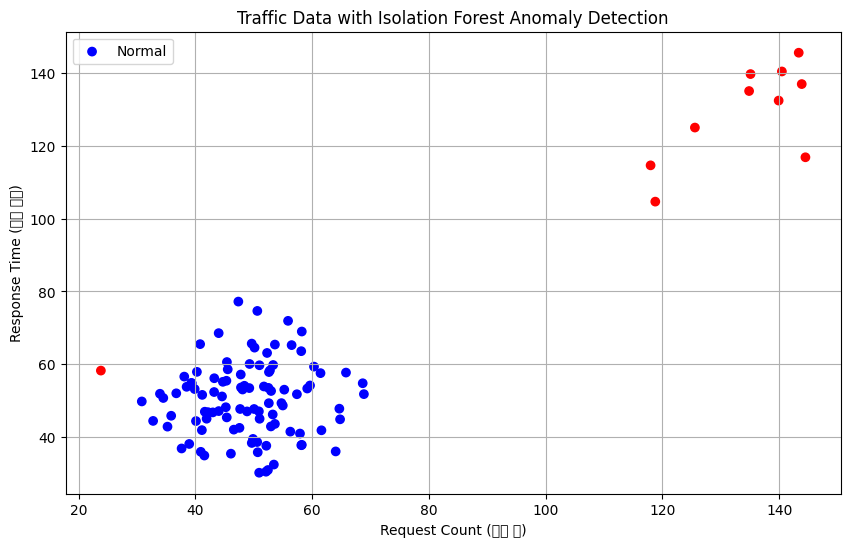

전체 데이터와 이상 탐지 결과:
     Request Count  Response Time  Anomaly Score  Anomaly
0        54.967142      48.617357              1   Normal
1        56.476885      65.230299              1   Normal
2        47.658466      47.658630              1   Normal
3        65.792128      57.674347              1   Normal
4        45.305256      55.425600              1   Normal
..             ...            ...            ...      ...
105     125.567120     125.075815             -1  Anomaly
106     139.914759     132.498197             -1  Anomaly
107     135.098344     139.789633             -1  Anomaly
108     144.500267     116.899758             -1  Anomaly
109     118.779148     104.699097             -1  Anomaly

[110 rows x 4 columns]


In [14]:
# 1. 데이터 생성
# 시드 고정: 재현성을 위해 난수 시드를 고정
np.random.seed(42)
# 정상 트래픽 데이터 생성
# 평균(loc=50), 표준편차(scale=10)를 따르는 정규분포에서 데이터 생성 (100개의 샘플, 2차원)
normal_traffic = np.random.normal(loc=50, scale=10, size=(100, 2))
# 비정상 트래픽 데이터 생성
# 일정 범위(low=100, high=150)에서 균등분포로 비정상적으로 높은 값 생성 (10개의 샘플, 2차원)
anomalous_traffic = np.random.uniform(low=100, high=150, size=(10, 2))
# 정상 데이터와 비정상 데이터를 결합
traffic_data = np.vstack((normal_traffic, anomalous_traffic))
# 데이터를 pandas DataFrame으로 변환
traffic_df = pd.DataFrame(traffic_data, columns=["Request Count", "Response Time"])



# 2. Isolation Forest 모델 생성 및 학습
# Isolation Forest 초기화
# - n_estimators: 트리의 개수 (모델 복잡도에 영향을 미침)
# - contamination: 이상치로 간주할 데이터의 비율 (10%로 설정)
# - random_state: 난수 시드 (재현성을 위해 설정)
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
# 모델 학습 후 예측 수행
# - fit_predict: 데이터를 학습하면서 이상치를 탐지 (-1: 이상치, 1: 정상)
traffic_df['Anomaly Score'] = model.fit_predict(traffic_data)
# 이상 탐지 결과를 해석하여 "Normal" 또는 "Anomaly"로 표시
traffic_df['Anomaly'] = traffic_df['Anomaly Score'].apply(lambda x: "Normal" if x == 1 else "Anomaly")



# 3. 비정상 데이터의 범위 확인 - 이상 데이터만 필터링
anomalous_data = traffic_df[traffic_df['Anomaly'] == "Anomaly"]
# 이상 범위를 출력
min_request_count = anomalous_data["Request Count"].min()
max_request_count = anomalous_data["Request Count"].max()
min_response_time = anomalous_data["Response Time"].min()
max_response_time = anomalous_data["Response Time"].max()
print(f"비정상 데이터 범위:")
print(f"- 요청 수 (Request Count): {min_request_count:.2f} ~ {max_request_count:.2f}")
print(f"- 응답 시간 (Response Time): {min_response_time:.2f} ~ {max_response_time:.2f}")




# 4. 시각화
# 정상과 비정상을 다른 색으로 표시하여 트래픽 데이터 시각화
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10, 6))
plt.scatter(
traffic_df["Request Count"], traffic_df["Response Time"], c=traffic_df['Anomaly'].map({"Normal": "blue", "Anomaly": "red"}), # 색상 매핑
label='Traffic')

plt.title("Traffic Data with Isolation Forest Anomaly Detection")
plt.xlabel("Request Count (요청 수)")
plt.ylabel("Response Time (응답 시간)")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()



# 5. 결과 출력
# 전체 데이터프레임을 출력하여 정상/비정상 데이터 확인
print("전체 데이터와 이상 탐지 결과:")
print(traffic_df)

## IsolationForest, DBSCAN

In [15]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\projec

비정상 데이터 범위:
- 요청 수 (Request Count): 117.97 ~ 144.50
- 응답 시간 (Response Time): 104.70 ~ 116.90


findfont: Font family 'NanumGothic' not found.
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont:

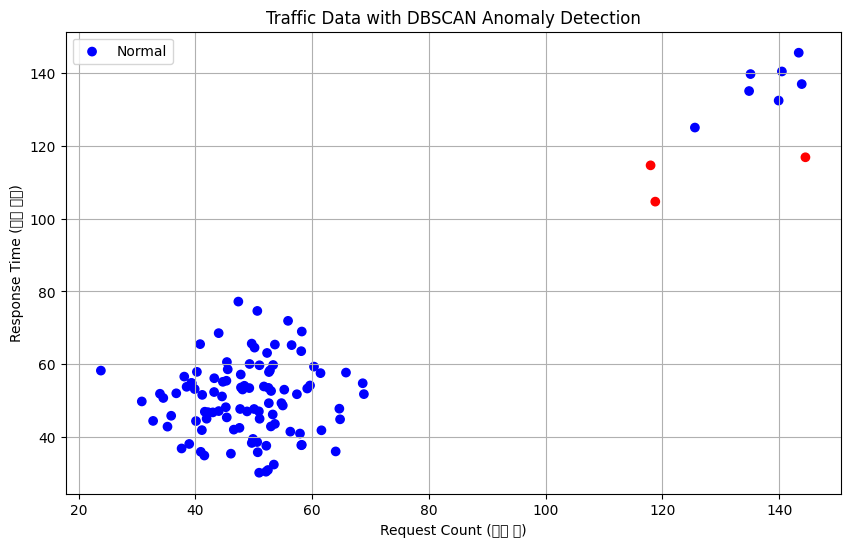

전체 데이터와 DBSCAN 이상 탐지 결과:
     Request Count  Response Time  Cluster  Anomaly
0        54.967142      48.617357        0   Normal
1        56.476885      65.230299        0   Normal
2        47.658466      47.658630        0   Normal
3        65.792128      57.674347        0   Normal
4        45.305256      55.425600        0   Normal
..             ...            ...      ...      ...
105     125.567120     125.075815        1   Normal
106     139.914759     132.498197        1   Normal
107     135.098344     139.789633        1   Normal
108     144.500267     116.899758       -1  Anomaly
109     118.779148     104.699097       -1  Anomaly

[110 rows x 4 columns]


In [16]:
# 1. 데이터 생성
# 난수 시드 고정
np.random.seed(42)
# 정상 트래픽 데이터 생성 (평균: 50, 표준편차: 10)
normal_traffic = np.random.normal(loc=50, scale=10, size=(100, 2))
# 비정상 트래픽 데이터 생성 (비정상적으로 높은 값)
anomalous_traffic = np.random.uniform(low=100, high=150, size=(10, 2))
# 데이터 결합
traffic_data = np.vstack((normal_traffic, anomalous_traffic))
# 데이터프레임으로 변환
traffic_df = pd.DataFrame(traffic_data, columns=["Request Count", "Response Time"])



# 2. DBSCAN 모델 생성
# eps: 클러스터의 반경 (밀도를 정의)
# min_samples: 한 클러스터를 구성하기 위한 최소 샘플 수
dbscan = DBSCAN(eps=15, min_samples=5)
# DBSCAN 모델 적용
# fit_predict: 클러스터링 수행 (-1은 이상치, 나머지는 클러스터 ID)
traffic_df['Cluster'] = dbscan.fit_predict(traffic_data)



# 3. 이상치 탐지
# 이상치는 Cluster 값이 -1인 데이터
traffic_df['Anomaly'] = traffic_df['Cluster'].apply(lambda x:
"Anomaly" if x == -1 else "Normal")
# 이상치 범위 확인
anomalous_data = traffic_df[traffic_df['Anomaly'] == "Anomaly"]
min_request_count = anomalous_data["Request Count"].min()
max_request_count = anomalous_data["Request Count"].max()
min_response_time = anomalous_data["Response Time"].min()
max_response_time = anomalous_data["Response Time"].max()
print(f"비정상 데이터 범위:")
print(f"- 요청 수 (Request Count): {min_request_count:.2f} ~ {max_request_count:.2f}")
print(f"- 응답 시간 (Response Time): {min_response_time:.2f} ~ {max_response_time:.2f}")




# 4. 시각화
plt.rcParams['font.family'] = 'NanumGothic' # 한글 폰트 설정
plt.figure(figsize=(10, 6))
plt.scatter(
traffic_df["Request Count"], traffic_df["Response Time"],
c=traffic_df['Anomaly'].map({"Normal": "blue", "Anomaly":
"red"}), # 색상 매핑
label="Traffic"
)
plt.title("Traffic Data with DBSCAN Anomaly Detection")
plt.xlabel("Request Count (요청 수)")
plt.ylabel("Response Time (응답 시간)")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()



# 5. 결과 출력
# 전체 데이터프레임 출력
print("전체 데이터와 DBSCAN 이상 탐지 결과:")
print(traffic_df)